# Section 6 - Basic Bayesian Inference

# 1. Summary of Bayesian Inference

In this activity, you will explore the problem of estimating probabilities from data using Bayesian faremework: 
1. **start** with our current knowledge (prior) on the paramater of interest $\theta$
2. **update** our knowledge according to some observed data $x_1, \dots, x_n$.

Because the parameter of interest is treated as a random variable with a distribution, we call the random variable $\Theta$ and the specific observed value $\theta$.

Based on the Bayes' theorom, the **_posterior_** distribution incorporates a vector of observations $x = (x_1, \dots, x_n)$ into the distribution of $\Theta$. The posterior distribution may be thought of as the prior distribution modified with observed data. The formula of the posterior distribution is
$$
p(\theta | x) \ = \ \frac{p(x|\theta)p(\theta)}{\int_{\theta}\ p(x|\theta)p(\theta) \ d\theta} \ = \ \frac{\text{likelihood} \cdot \text{prior}}{\text{normalizing constant}}.
$$
- $p(x|\theta)$ is the **likelihood** that we see the observed data, given parameter $\theta$.
- $p(\theta)$ is the **prior** distribution that captures our knowledge about the $\theta$ before seeing the observed data. In other words, prior distribution describes our best guess about $\theta$ before observing the data.

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 2. Estimating Chemotherapy Response Rates
Efficacy of a new chemotherapy medication is under investigation. Use Bayesian inference to judge if the medication actually works.
- $\theta$ is the parameter of interest, the success rate of the medication.

- $x_1, \dots, x_n$ are the samples of whether the medication worked on test subjects.
    - 1 represents successful  medication
    - 0 represents unsuccessful/no response to medication. 

## 2.1 Prior distribution: beta $p(\theta)$
### Preliminary results
Based on a preliminary results (prior) with 10 samples it is believed that:
- prior mean: on average $\theta=$ 90% of patients will respond successfully to this medication. 
- prior std: with high probability (>95%), the success rate will not go below 80%. 

**Discuss:** 
1. What prior distribution should we use? 
    
    (Hint: the prior has to take on values only between 0 and 1. What distributions do we know does that? What distributions are ill-suited?)

    **Ans:** A suitable prior distribution $p(\theta)$ for $\Theta$ is Beta(a,b). 

2. According to the preliminary results, why can make the approximation that
    $$\mu = 0.9 \quad \text{ and } \quad \mu - 2\sigma=0.8?$$

    **Ans:** Because the mean is 0.9 and twice the standard deviation gives the 95% region.


3. Thomas thinks that Bernoulli makes better sense because chemotherapy is about probability of success. How is he mistaken? 
    
    (Bonus: Thomas is the name of which famous statistician?)

    **Ans:** Bernoulli only takes on values 0 or 1. So, if we use Bernoulli, our model restricts us to only two possible hypothesis about the success rate of the medication: 0 (completely useless) or 1 (completely perfect magic potion).
    
    On the other hand, Beta takes any value between [0,1], so our model allows the medication success rate to have all options between 0 and 1. This is moer realistic, because medications someitmes work, sometimes don't!

### Beta prior
**Task:** 

Based on the above information, code up the prior.
1. Define prior mean ```mu``` and prior standard deviation ```sigma``` using the preliminary result and investigators' beliefs.
2. Define prior Beta(a,b) distribution parameters ```a``` and ```b```, using ```mu``` and ```sigma``` defined earlier. 

    How? You will need to invert 
    $$
    \mu = E[\Theta] = \frac{a}{a+b} \quad \text{ and } \quad \sigma^2 = E[\Theta^2] = \frac{ab}{(a+b)^2(a+b+1)}.
    $$ 
    We do this for you
    $$
    a = \mu\left( \frac{\mu(1-\mu)}{\sigma^2} - 1\right) \quad \text{ and } \quad b = (1-\mu)\left( \frac{\mu(1-\mu)}{\sigma^2} - 1\right),
    $$
    which is the method of moments in the formula table given in [Wiki: Beta](https://en.wikipedia.org/wiki/Beta_distribution#:~:text=Beta%20function.-,Beta,-Probability%20density%20function).


In [2]:
# mean and standard deviation
mu = 0.9                # TODO
sigma = (mu - 0.8)/2    # TODO

# using method of moments to define the beta distribution parameters a an b
a = mu*( (mu*(1-mu)/(sigma**2)) - 1 )           # TODO
b = (1 - mu) * ( (mu*(1-mu)/(sigma**2)) - 1 )   # TODO

3. Define `theta` an array that represents the horizontal axis/range of parameters we are computing the posterior for. 
4. Define `prior`, an array of prior probabilities $p(\theta)$ for each parameter $\theta$.
    - call the beta pdf function stats.beta.pdf().
5. Plot `prior` against `theta`. 
    - You should have at least 100 points.
    - Note that domain/support of Beta is always [0,1].
6. Verify that the shape of the plotted prior density is consistent with the preliminary results described earlier.

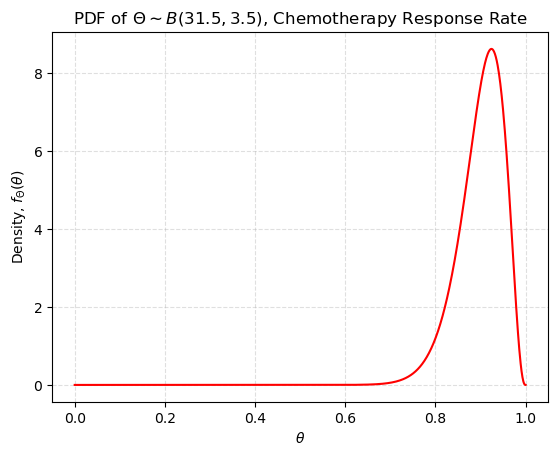

In [3]:
# domain θ
theta = np.linspace(0, 1, 1000)                 # TODO
prior = stats.beta.pdf(x = theta, a=a, b=b)     # TODO

# plot
plt.plot(theta, prior, 'r')

plt.title(f'PDF of $\Theta \sim B({a:.1f},{b:.1f})$, Chemotherapy Response Rate'); 
plt.xlabel(r'$\theta$'); plt.ylabel(r'Density, $f_{\Theta}(\theta)$')
plt.grid(alpha=.4, linestyle='--')
plt.show()

## 2.2 Likelihood: binomial $p(x|\theta)$
### New trial data
During a new trial ($n=30$), the following data was collected
$$x = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] \in \{0,1\}^{30}.$$
- 1 represents successful  medication
- 0 represents unsuccessful/no response to medication. 

**Discuss:**
Run the cell below. Before we continue with Bayesian analysis, intuitively, do you think the 10 preliminary result/prior distribution (mean = 0.9, std=0.05) is  consistent with the 30 observed data from the new trial? 

**Ans:** Yes and no. 

- Yes because the new trial mean (0.73) is somewhat high and close to the prior mean (0.9). 
- No because new trial mean (0.73) is actually expected to be very unlikely according to the prior standard deviation (above 0.8 with 95%). 


In [4]:
trial_data = np.array([1,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1])
print('mean of trial data:', np.mean(trial_data))

mean of trial data: 0.7333333333333333


### Binomial likelihood
A suitable likelihood function $p(x|\theta)$ is binomial(n,$\theta$).

**Discuss:**
1. Why might Binomial be reasonable for the observed trial data/likelihood?

    **Ans:** 
    - trials are either a **success or a failure**
    - reasonable to assume that trials are **independent**
    - reasonable to assume that new trial has s**ame probability of success**

2. What is the formula for Binomial likelihood $p(x|\theta)$, probability of $x$ successes in $n$ trials? 

    **Ans:** $p(x|\theta) = \begin{pmatrix} n \\ x \end{pmatrix} \theta^x (1-\theta)^{n-x}$.

3. Does the likelihood function integrate to 1? I.e., does $\int_0^1 p(x|\theta) d\theta = 1$? What does it tells us about the difference between a likelihood function and a probability density?

    **Ans:** No. A likelihood does not need to integrate to 1, but a density needs to. 
    
    Likelihoods are functions of parameters $\theta$, whereas densities are functions of the variables $x$. That's why it does not need to integrate to 1. Thus, likelihoods are not a type of density.
    
    Computation of likelihood <u>not</u> integrating to 1:
    $$\begin{align*}
    \int_0^1 p(x|\theta) d\theta \
    &= \ \int_0^1 \begin{pmatrix} n \\ x \end{pmatrix} \theta^x (1-\theta)^{n-x} d\theta  \\
    &= \ \dots \text{(repeatedly integrating by parts)} \dots \\
    &= \ \begin{pmatrix} n \\ x \end{pmatrix} \frac{(n-x)\dots(n-x+1-(n-x))}{(x+1)\dots(x+n-x)} \int_0^1 \theta^{x+n-x} d\theta \\
    &= \ \int_0^1 \theta^{n} d\theta \\
    &= \ \frac{1}{n+1} \\
    &\neq \ 1 \quad \text{for all $n \geq 1$}.
    \end{align*}$$

**Task:** 

1. `likelihood`, which is an array of likelihoods $p(x|\theta)$ for each $\theta$
    - call the stats.binom.pmf() function. In the arguments for the function:
    - number of successes `k` and total number of trials `n` is fixed.
    - success probability `p` (which is $\theta$ we are trying to infer) is variable. You should input `theta` defined earlier here.
2. Plot `likelihood` against `theta`.

The plot shows the probability of observing fixed sample $x = (x_1, \dots, x_n)$ above, but changing parameter values $\theta$'s.

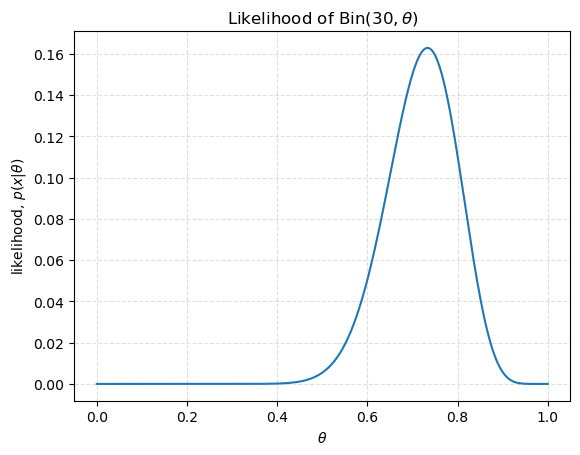

In [5]:
likelihood = stats.binom.pmf(k = np.sum(trial_data), n = len(trial_data), p = theta)        # TODO

plt.plot(theta, likelihood)

plt.title(f'Likelihood of Bin$({len(trial_data):d},\\theta)$')
plt.xlabel(r'$\theta$'); plt.ylabel(r'likelihood, $p(x|\theta)$')
plt.grid(alpha=.4, linestyle='--')
plt.show()

## 2.3 Posterior Distribution: $p(\theta|x)$

Recall, the formula of the posterior distribution is
$$
p(\theta | x) \ = \ \frac{p(x|\theta)p(\theta)}{\int_{\theta}  \ p(x|\theta)p(\theta) \ d\theta} \ = \ \frac{\text{likelihood} \cdot \text{prior}}{\text{normalizing constant}}.
$$
Our next goal is to compute the posterior step-by-step, using the prior and likelihood computed earlier.

**Task:**
1. Compute the numerator of the posterior `post_nume`, $p(x|\theta)p(\theta)$ 
    - multiply `likelihood` and `prior`.
2. Compute the denominator of the posterior `post_denom`, $\int_{\theta}p(x|\theta)p(\theta)d\theta$.
    - method 1: np.trapz(), which integrates the area under the "curve". For this approximation to be accurate, `theta` must be a long/dense array with many points.
    - method 2: stats.betabinom.pmf(), which is exactly the distribution of the numerator! Key in relevant parameters.

In [6]:
post_nume = likelihood * prior      # TODO

# method 1: integration numerically via np.trapz
# Note that in practice, when dealing with multivariate data, this approach becomes 
# extensively difficult. In those cases, other numerical methods based on random sampling 
# is used.
post_denom_trapz = np.trapz(post_nume,theta)

# method 2: built-in scipy.stats.betabinom.pmf function, basically analytic, up to how the beta function is computed in source code
# But how do we know it follows this beta-binomial distribution? See word block below for derivation.
# Hence, a limitation of this approach is knowing the distribution, which can sometimes be hard to see.
post_denom_bb = stats.betabinom.pmf(k = np.sum(trial_data), n = len(trial_data), a = a, b = b)

# compare methods 1 and 2
print(f'Difference between method1 and method2: {np.abs(post_denom_bb - post_denom_trapz)}')

# set to be either value
post_denom = post_denom_trapz       # TODO

Difference between method1 and method2: 5.551115123125783e-17


**Task:**
1. Compute `posterior` an array of posterior probabilities $p(\theta | x)$
    - `post_nume` divide `post_denom`
2. Plot the posterior density.
3. Plot the prior density and likelihood on the same figure too. 

Area under the curve for the posterior is 1.0


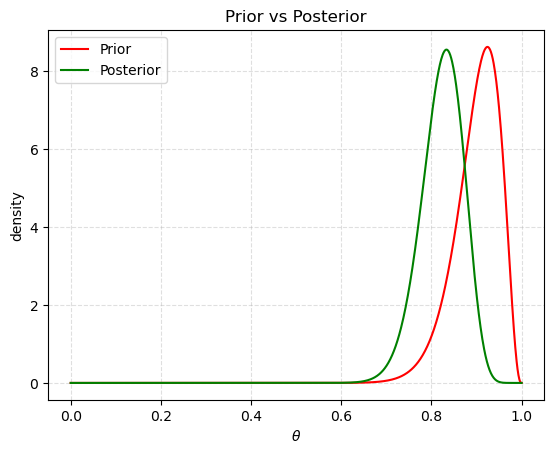

In [7]:
posterior = post_nume / post_denom          # TODO

# optional, but good sanity check.  check the area of posterior distribution
area_posterior = np.trapz(post_nume/post_denom, theta)
print(f'Area under the curve for the posterior is {area_posterior}')

# plot the prior, likelihood, and posterior probabilities
plt.plot(theta, prior, 'r', label="Prior")
plt.plot(theta, posterior, 'g', label='Posterior')
plt.grid(alpha=.4, linestyle='--')
plt.xlabel(r'$\theta$'); plt.ylabel('density'); plt.legend()
plt.title('Prior vs Posterior')
plt.show()

**Discuss:**
1. Given the posterior plot, how can we find a possible prediction $\widehat{\theta}$ for the parameter of interest $\theta$? What makes sense for the "most likely" value of $\theta$? 

    **Ans:** the $\theta$ that gives the max of the posterior density is a possible candidate. This is called maximum a posteriori (MAP).

2. Compute `theta_hat`, the predictor $\widehat{\theta}$.
    - it might help to use np.argmax()

3. Plot the posterior density and a dotted vertical line $\theta = \widehat{\theta}$ for the predictor $\widehat{\theta}$ you decided on.

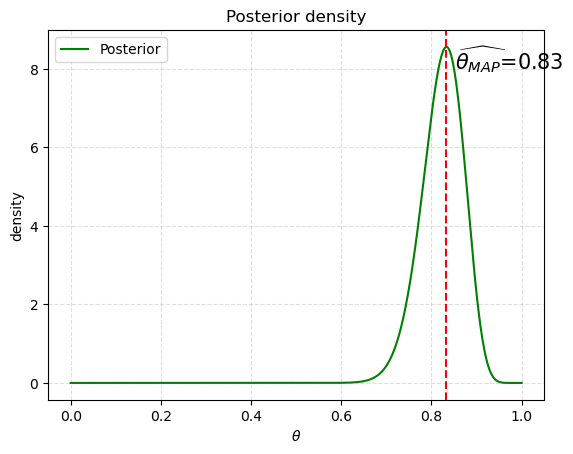

In [8]:
# get candidate theta by computing theta that maximizes posterior, i.e., the posterior mode.
# another candidate is posterior mean
theta_hat = theta[np.argmax(posterior)]             # TODO

plt.plot(theta, posterior, label='Posterior', color='g')
plt.axvline(x= theta_hat, color='red', linestyle='--')
plt.text(theta_hat + 0.02, 8, r'$\widehat{\theta_{MAP}}$='+f'{theta_hat:.2f}', fontsize=15)
plt.grid(alpha=.4, linestyle='--')
plt.xlabel(r'$\theta$'); plt.ylabel('density'); plt.legend()
plt.title('Posterior density')
plt.show()

# Appendix: Conjugate priors and beta-binomial (good to understand if you want to pursue further applied math)

A major difficulty in Bayesian analysis is finding an explicit posterior distribution, given the likelihood and prior. 

The posterior is proportional to the product of the likelihood and prior, but the normalizing constant/marginal distribution in the denominator, is often difficult to compute since it involves integration. 

In today's section, we had binomial likelihood and beta prior. The binomial **likelihood** is
$$
p(x|\theta) = \binom{n}{x}\theta^{x}(1-\theta)^{n-x},
$$
where $\theta$ is the response rate parameter of interest.

For a beta **prior**, we will have the prior distribution
$$
p(\theta) = \frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1},
$$
where $B(.,.)$ is the beta function which itself normalizes function to make it a density that integrates to 1.

The **posterior** is proportional to the product of the likelihood and the prior
$$
p(\theta|x) = C\cdot\theta^{x}(1-\theta)^{n-x}\cdot\theta^{a-1}(1-\theta)^{b-1} = C\cdot\theta^{x+a-1}(1-\theta)^{n-x+b-1},
$$
where C is the normalizing constant 
$$
C = \binom{n}{x}\frac{1}{p(x)B(a,b)}.
$$

We see that the posterior density remains beta (amazing!) with parameters $x+a$ and $n-x+b$, and with normalizing constant $\frac{1}{B(x+a,n-x+b)}$. Therefore, we can infer that the above equation for $C$ is really just
$$
\begin{align}
& \frac{\binom{n}{x}}{p(x)B(a,b)} = C = \frac{1}{B(x+a,n-x+b)} \\
& \implies p(x) = \frac{\binom{n}{x}B(x+a,n-x+b)}{B(a,b)},
\end{align}
$$
which is known as a beta-binomial distribution. 

In this example, the effect of likelihood is only to update the prior parameters and not to change the prior’s functional form. Such priors are **conjugate** with the likelihood.

Note that our initial guess about parameters was $p(\theta)$. Now that more data were made availabe, we are upgrading our prior information into a more informative guess $p(\theta|x)$. A possible estimator for $\theta$ is obtained by finding the $\theta$ which maximizes the value of posterior distribution (**maximum a posteriori [MAP]**).